In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv("movies.csv", header=None)
data.drop([0], inplace=True)
# we will try to estimate the gross income made by the movie
cols = {0:'Name', 1:'Rating', 2:'Genre', 3:'Year', 4:'Released', 5:'Score', 6:'Votes',7:'Directed' ,8:'Writer' ,9:'Star' ,10:'Country', 11: 'Budget', 12: 'Gross', 13:'Company', 14:'Runtime'}

#data that has dropped NA values 
est_data = data.dropna(subset=[5,6,7,11])
est_data.rename(columns=cols, inplace=True)
#attempt to predict gross based on the given budget
data.drop(data.columns[[0,1,2,3,4,5,6,7,8,9,10,13,14]], axis=1, inplace=True)

cols = {11: 'Budget', 12: 'Gross'}
data.rename(columns=cols, inplace=True)
data = data.astype(np.float64)

scaler = StandardScaler()

data

/tmp/ipykernel_1475/2393525440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_data.rename(columns=cols, inplace=True)


,Budget,Gross
1,"19,000,000.0","46,998,772.0"
2,"4,500,000.0","58,853,106.0"
3,"18,000,000.0","538,375,067.0"
4,"3,500,000.0","83,453,539.0"
5,"6,000,000.0","39,846,344.0"
...,...,...
7664,"7,000.0",NaN
7665,NaN,NaN
7666,"58,750.0",NaN
7667,"15,000.0",NaN


In [17]:
gross_est = data
gross_est.dropna(axis=0, how='any', inplace=True)
X = data.iloc[:, 0]
Y = data.iloc[:, 1]


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

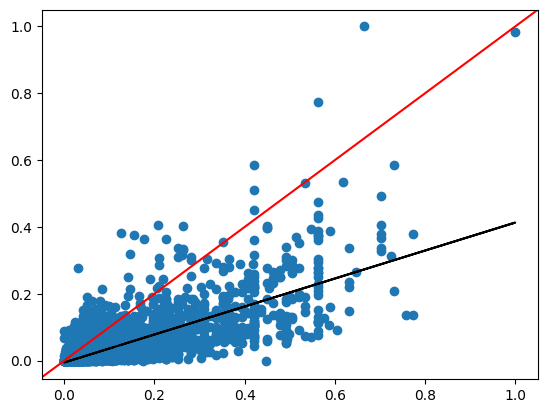

,0
0,0.04010818937888654
1,0.020544963345782246
2,0.04010818937888654
3,0.033587114034518445
4,0.17052969626624856
...,...
1354,0.014023888001414148
1355,0.2070477181947099
1356,0.017936533208035007
1357,0.030978683896771206


In [19]:
# we will be predicting the gross with the budget alone
  # after observing the data, the other independent variables provide
    # convoluted data when assessing how much the movie made
      # Name: Irrelevant data
      # Rating: terrible movies can profit regardless, ex Morbius
      # genre: Irrelevant data, not ordinal data
      # year: when the movie came out should not be a factor
        # could be useful when comparing when a genre was good
      # released: same as year above
      # votes: refers to number of votes, how many people watched a
        # movie does not indicate how good it was, ex Morbius
      # Director: May be useful, however not necessary when determining gross
        # arguably able to determine budget instead
      # Writer: same as director
      # Star: Same as director
      # Country: location should not matter
      # Company: not all companies on this list are able to determine gross
        # and budget by name alone, smaller companies would be difficult
      # Runtime: duration of movie should not matter
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=None)

x_train = x_train - x_train.min()
x_train = x_train / x_train.max()
x_test = x_test - x_test.min()
x_test = x_test / x_test.max()
y_train = y_train - y_train.min()
y_train = y_train / y_train.max()
y_test = y_test - y_test.min()
y_test = y_test / y_test.max()

reg = LinearRegression().fit(x_train.values.reshape(-1, 1), y_train)
pred = reg.predict(x_test.values.reshape(-1, 1))

plt.scatter(x_train,y_train)
plt.plot(x_test, pred, color='k')
plt.axline((0, 0), slope=1, color = 'r')
plt.show()

pd.DataFrame(pred)

In [20]:
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
print(RMSE)
print(MAE)

#values are close to be decent in predicting accurate values

0.059925485043643485
0.02983486100221196


```
pseudo code
grab original data with everything in it
separate data in to 2 data sets
drop datasets that contain null in anywhere expect gross
of the remaining data, separate into:
  1: data that has gross as null
  2: the rest of the data that does not have gross as null
use the linear model to predict the gross
put both data sets back together
that will be our new dataset we are working with
refer to the google doc with our proposal on it for further instructions


/home/nodaj/.local/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


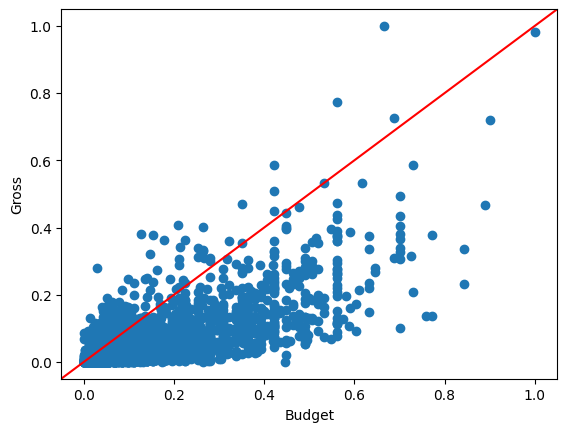

,Budget,Gross
0,"36,000,000.0","12,718,913.56"
1,"300,000.0",-770.88
2,"35,000,000.0","12,016,715.56"
3,"20,000,000.0","3,876,167.37"
4,"11,000,000.0","1,145,018.07"
5,"900,000.0","3,070.32"
6,"3,000,000.0","73,035.48"
7,"3,000,000.0","73,035.48"
8,"8,000,000.0","593,498.23"
9,"250,000.0",-767.0


In [21]:
#formatting 
pd.options.display.float_format = '{:,}'.format

#split into gross filled or not
na_df = est_data[est_data['Gross'].isnull()]
filled_df = est_data[est_data['Gross'].notnull()]

#drop columns 
#orig_na is the original budget that we have before normalizing, new_na_df is the dataset we will be using with the model 
na_df_copy = na_df.copy()
new_na_df = na_df.drop(columns=['Name', 'Rating', 'Genre', 'Year', 'Released', 'Score', 'Votes', 'Directed', 'Writer', 'Star', 'Country', 'Gross', 'Company', 'Runtime'], axis=1)
new_na_df = new_na_df.astype(np.float64)
orig_na = new_na_df.copy()

#normalize new data 
new_na_df -= new_na_df.min()
new_na_df /= new_na_df.max()

#predict revenue
new_na_pred = reg.predict(new_na_df)

#original data's budget flattened
orig_na = orig_na.to_numpy()
orig_na = orig_na.flatten()

#prediction df
predicted_gross = pd.DataFrame({'Budget': orig_na.round(2) , 'Gross': (new_na_pred * orig_na).round(2)})
na_df_copy['Gross'] = predicted_gross['Gross'].values

#replace gross < 0 
na_df_copy.drop(na_df_copy[na_df_copy['Gross'] < 0].index, inplace=True)

#concat the two dataframes
filled = pd.concat([filled_df, na_df_copy])

#normalized data
normalized_budget = filled['Budget'].astype(float)
normalized_gross = filled['Gross'].astype(float)

#added filled in data to previous plot
normalized_budget = (normalized_budget - normalized_budget.min()) / normalized_budget.max()
normalized_gross = (normalized_gross - normalized_gross.min()) / normalized_gross.max()
plt.scatter(normalized_budget, normalized_gross)
plt.axline((0, 0), slope=1, color = 'r')
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()
pd.DataFrame(predicted_gross)

At this point, our data has been filled in to the best of our abilities. It is important to note that a majority of movies DO NOT PROFIT, which goes with our model that we found. Looking at the plot above comparing budget to gross, any movie will break even, if it is above the line y = x. This means that a majority of the movies that were in the sample did not profit. With that, we will proceed with completing the initial goal of giving an inherent rating to each director based of their performance.

pseudo code
we well be using the following columns:
  - Director
  - Rating (score out of 10)
  - Votes
  - Total Income (Gross - Budget)

- separate the mentioned data above, meaning drop the rest of the unused variables
- Once again do linear regression
  - directors who show up more than once, simply average their rating
  - i would like to make it so that it becomes a bell curve
  - display ratings however


In [22]:
import matplotlib.pyplot as plt


In [23]:
#get copy of data from the filled gross in linear regression above
data = filled.copy()

#make dataframe with gross - budget for income
income = (data.loc[:, 'Gross'].astype(float) - data.loc[:, 'Budget'].astype(float))/data.loc[:, 'Budget'].astype(float)
income = pd.DataFrame(income)

#new data
data.drop(columns=['Name', 'Rating', 'Genre', 'Year', 'Released', 'Writer', 'Star', 'Country', 'Budget', 'Gross', 'Company', 'Runtime'], inplace=True)
data.insert(2, 'Income', income)
data

,Score,Votes,Income,Directed
1,8.4,927000.0,1.4736195789473685,Stanley Kubrick
2,5.8,65000.0,12.078468,Randal Kleiser
3,8.7,1200000.0,28.909725944444446,Irvin Kershner
4,7.7,221000.0,22.843868285714287,Jim Abrahams
5,7.3,108000.0,5.641057333333333,Harold Ramis
...,...,...,...,...
5034,6.3,12000.0,-0.9955916899999999,Katherine Brooks
5288,7.4,76000.0,-0.9766516827586207,Ric Roman Waugh
6770,8.2,75000.0,-0.9118569265957446,Nishikant Kamat
7563,4.1,7900.0,-0.8261284794444443,Fred Durst


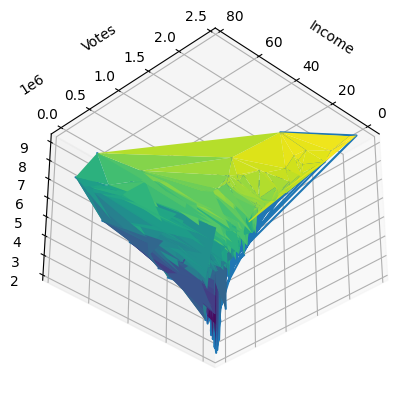

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#remove outliers
graph_data = data[data['Income'] < 80]

xdata = graph_data.iloc[:, 2].astype(float)
ydata = graph_data.iloc[:, 1].astype(float)
zdata = graph_data.iloc[:, 0].astype(float)

ax.plot3D(xdata, ydata, zdata)
ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none')
ax.set_xlabel('Income')
ax.set_ylabel('Votes')
ax.set_zlabel('Score')
ax.view_init(-35, 45)
plt.show()

In [25]:
Y = data.iloc[:, 0].astype(float)
X = data.iloc[:, 1:4]

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=None)
x_train_names = x_train.iloc[:, 2]
x_test_names = x_test.iloc[:, 2]
x_train = x_train.iloc[:, 0:2].astype(float)
x_test = x_test.iloc[:, 0:2].astype(float)

#normalization
x_train = x_train - x_train.min()
x_train = x_train / x_train.max()
x_test = x_test - x_test.min()
x_test = x_test / x_test.max()
y_train = y_train - y_train.min()
y_train = y_train / y_train.max()
y_test = y_test - y_test.min()
y_test = y_test / y_test.max()

#gradient descent linear regression model
scoreReg = SGDRegressor(max_iter=10000, tol=1e-5).fit(x_train, y_train)
scorePred = scoreReg.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, scorePred))
MAE = mean_absolute_error(y_test, scorePred)

scorePred = pd.DataFrame(scorePred * 10, columns=['Rating'])
scorePred.insert(1, 'Director Name', x_test_names.values)

In [26]:
from collections import defaultdict

director_rating = defaultdict(tuple)

#tuples read as: (sum, avg, number of movies made)
for i, r in scorePred.iterrows():
  if r['Director Name'] in director_rating:
    sum = director_rating[r['Director Name']][0] + r['Rating']
    count = director_rating[r['Director Name']][2] + 1

    director_rating[r['Director Name']] = (sum, sum / count, count)
  else:
    director_rating[r['Director Name']] = (r['Rating'], r['Rating'], 1)

director_rating = pd.DataFrame([(i, round(v[1],2)) for i , v in director_rating.items()], columns=['Director Name', 'Rating'])
director_rating

,Director Name,Rating
0,Peter Strickland,5.89
1,Denis Villeneuve,7.51
2,Stephen Elliott,5.88
3,Gurinder Chadha,5.91
4,John Waters,5.9
...,...,...
888,David Greenwalt,5.86
889,Tommy O'Haver,6.03
890,Allan Arkush,5.86
891,Howard Storm,5.89


In [27]:
print(RMSE)
print(MAE)

0.13238556608299315
0.1042977243487023


In [28]:
#counts number of directors of a particular rating, rounded down
rating_data = director_rating['Rating'].apply(np.floor)
count = pd.Series(rating_data).value_counts()
count_df = pd.DataFrame(count)
count_df

,Rating
5.0,470
6.0,400
7.0,22
9.0,1
